In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [6]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """

    
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    
    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    
    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

            
    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])
    
    
    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [41]:
img_dir = os.path.join(os.getcwd(), "Images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [52]:
X = pd.DataFrame([im.histogram() for im in images])

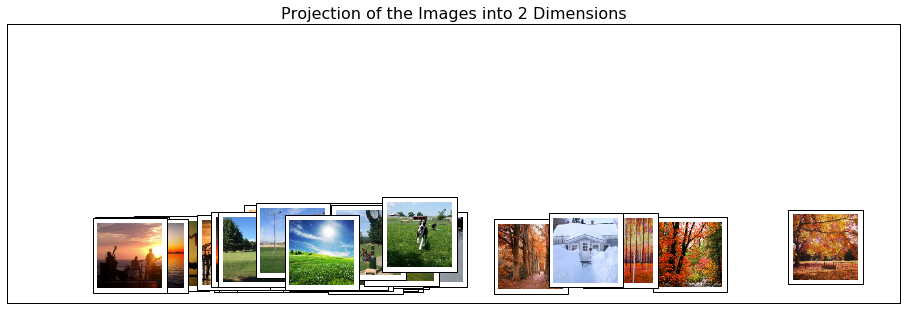

In [50]:
plot_image_space(images, X)

Images that are close together in this plot should have more similar histograms of color values- their proportions of certain colors should be similar. Conversely, images that are further apart will have more divergent histograms.

To some extent, images associated with a particular season tend to be closer together, though there are some very obvious exceptions. For example, there is an obviously-winter thumbnail right in the middle of a cluster of autumn images. (Could this be because the images were converted into grayscale, and that particular winter image had similar color values to the autumn images surrounding it?)

I collected a set of images which I thought would be much more difficult for this method to handle. As with the given images, they are easily classified by season to the human eye. However, that classification is less dependent on color than other visual cues. The images also include more confounding information- e.g., they might include buildings or people rather than being simple landscapes. (Unsurprisingly, as is visible below, the images were not well separated at all by PCA.) This led me to think more about what visual cues we use to identify and classify images- for example, many of the spring images I chose are distinguished by flowers in bloom. To get a computer to identify those images, you might establish a spring color palette (pinks, greens, and yellows would probably be most helpful) and look for the presence of those colors. You might also check for patterns like small clusters of similar colors repeated across a larger area. In autumn images, you would focus on leaves in the appropriate palette (oranges, reds, yellows, browns.)

In [7]:
my_img_dir = os.path.join(os.getcwd(), "Test")
my_images = load_images(my_img_dir)

In [8]:
Y = pd.DataFrame([im.histogram() for im in my_images])

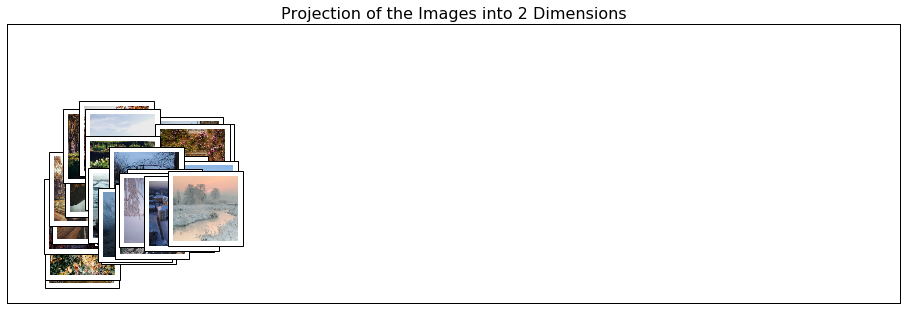

In [12]:
plot_image_space(my_images, Y)